In [167]:
# Importar TensorFlow e outras bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import random as rd
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsClassifier


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [168]:
letter  = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
numbers = np.linspace(1, len(letter), len(letter))

In [169]:
data='/Users/thomasgaehtgens/Desktop/level_1/training_data.csv'

test_1='/Users/thomasgaehtgens/Desktop/level_3/simple_test_data.csv'

df=pd.read_csv(data, header=None)

In [171]:
classes=df[1]

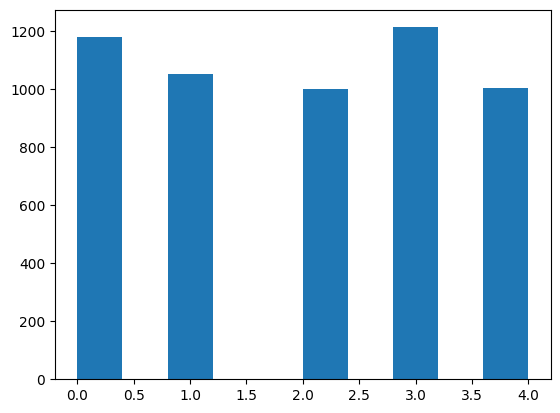

In [172]:
oi=plt.hist(classes)

In [173]:
oi[0]
submission=list()

for i in oi[0]:
    if i!=0:
        submission.append(int(i))

In [174]:
submission=np.array(submission).reshape(5, -1)

In [72]:
np.savetxt('level_1.txt', submission, delimiter=',')

In [73]:
moves=df[0]

In [74]:
moves_list=list(moves)

In [83]:
pop_these=list()
for i in range(len(moves_list)):
    if len(moves_list[i])!=30:
        pop_these.append(i)

In [175]:
df_clean=df.drop(df.index[pop_these])

In [176]:
df_clean

,0,1
0,fgiadcfabdhiecgcefhfefeeciedcb,3
1,bghfcdbaecdfgiadafaieicihdccbe,4
2,agidfedadgcaaeieccabcdbahgcdeh,1
3,gchcdfcghghhcfghbbeicfcdecfgbg,2
4,hgbdghafccgchicaafgdcagcdfcbbe,2
...,...,...
5452,behadefgfhcibdicddeibaafaigcgd,4
5453,dfffiehccefecifcceifgdeieghbcb,3
5454,hbbcddahicggbfiiegefbibbegegge,1
5455,caciabgddgdbefibhbcdehhbhgieib,1


In [86]:
sub_2=np.histogram(np.array(df_clean[1]), bins=[0, 1, 2, 3, 4, 5])[0].reshape(5, -1)

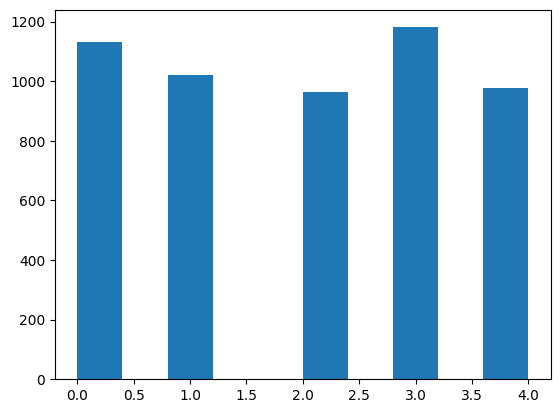

In [87]:
oi=plt.hist(np.array(df_clean[1]))

oi

In [88]:
oi

(array([1133.,    0., 1020.,    0.,    0.,  965.,    0., 1181.,    0.,
         976.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

In [93]:
dick=dict()

for i in range(len(numbers)):
    dick[letter[i]]=numbers[int(i)]

In [94]:
dick

{'a': 1.0,
 'b': 2.0,
 'c': 3.0,
 'd': 4.0,
 'e': 5.0,
 'f': 6.0,
 'g': 7.0,
 'h': 8.0,
 'i': 9.0}

In [96]:
def convert_string(string):
    output=list()
    for i in string:
        output.append(dick[i])
    return output
        

In [99]:
convert_string('abac')

[1.0, 2.0, 1.0, 3.0]

In [101]:
df_clean_3 = df_clean[~df_clean[1].isin([2, 3, 4])]

In [109]:
X=np.array(df_clean_3[0])
y=np.array(df_clean_3[1])

In [111]:
X=np.array([convert_string(i) for i in X]).astype(int)

In [112]:
X

array([[1, 7, 9, ..., 4, 5, 8],
       [6, 5, 2, ..., 3, 9, 4],
       [1, 9, 4, ..., 6, 3, 6],
       ...,
       [8, 2, 4, ..., 9, 9, 2],
       [8, 2, 2, ..., 7, 7, 5],
       [3, 1, 3, ..., 5, 9, 2]])

In [157]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=69)

In [158]:
kkn = KNeighborsClassifier(n_neighbors=20)
kkn.fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [159]:
sum(kkn.predict(Xtest)==ytest)/len(ytest)

0.7308584686774942

In [160]:
df_test=pd.read_csv(data, header=None)


In [161]:
Xtest=df_test[0]
Xtest=np.array([convert_string(i) for i in Xtest]).astype(int)


In [164]:
send=kkn.predict(Xtest)

In [166]:
np.savetxt('task_3.txt', send)

In [179]:
X=df_clean[0]
X=np.array([convert_string(i) for i in X]).astype(int)

y=df_clean[1]

In [182]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=69)

In [186]:
kkn = KNeighborsClassifier(n_neighbors=10)
kkn.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=10)

In [187]:
sum(kkn.predict(Xtest)==ytest)/len(ytest)

0.2720379146919431

In [211]:
input_shape=len(X[0])
def build_MLP(input_shape=input_shape):
    basic_model = Sequential([
        layers.Dense(100, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(5, activation='softmax')])

    adam = tf.keras.optimizers.Adam()

    basic_model.compile(optimizer=adam,
                      loss='sparse_categorical_crossentropy',
                      metrics=['Accuracy'])
    return basic_model

In [229]:
EPOCHS=100
batch_size=None

RNN=build_RNN()

history = RNN.fit(
  x=Xtrain,
  y=ytrain,
  batch_size=batch_size,
  validation_data=(Xtest, ytest),
  epochs=EPOCHS,
  shuffle=True
)

ValueError: Input 0 of layer "lstm_34" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 100, 1, 30)

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=30, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

In [299]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence

tf.random.set_seed(7)

In [300]:
top_words = 5000

In [301]:
len(X_train[0])

30

In [305]:
max_review_length = 30
X_train = sequence.pad_sequences(Xtrain, maxlen=max_review_length)
X_test = sequence.pad_sequences(Xtest, maxlen=max_review_length)

In [340]:
# create the model
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                        min_delta=0,
                                        patience=15,
                                        restore_best_weights=True,
                                        mode='auto')
model = Sequential()
model.add(Embedding(len(X), embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(120)),
model.add(layers.Dropout(0.4)),
model.add(Dense(100, activation='relu')),
model.add(Dense(5, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X, y, epochs=55, batch_size=64, callbacks=callback)

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 30, 32)            168800    
                                                                 
 lstm_62 (LSTM)              (None, 120)               73440     
                                                                 
 dropout_13 (Dropout)        (None, 120)               0         
                                                                 
 dense_71 (Dense)            (None, 100)               12100     
                                                                 
 dense_72 (Dense)            (None, 5)                 505       
                                                                 
Total params: 254,845
Trainable params: 254,845
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/55
83/83 [========================

83/83 [==============================] - 3s 39ms/step - loss: 0.0306 - accuracy: 0.9907
Epoch 24/55
83/83 [==============================] - 3s 38ms/step - loss: 0.0186 - accuracy: 0.9941
Epoch 25/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0173 - accuracy: 0.9949
Epoch 26/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0292 - accuracy: 0.9915
Epoch 27/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0086 - accuracy: 0.9977
Epoch 28/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0057 - accuracy: 0.9989
Epoch 29/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0071 - accuracy: 0.9981
Epoch 30/55
83/83 [==============================] - 3s 38ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 31/55
83/83 [==============================] - 3s 37ms/step - loss: 0.0193 - accuracy: 0.9953
Epoch 32/55
83/83 [==============================] - 3s 38ms/step - loss: 0.0178 - accuracy: 0.9945
Epoch 33/55


Epoch 50/55
83/83 [==============================] - 4s 44ms/step - loss: 0.0042 - accuracy: 0.9983
Epoch 51/55
83/83 [==============================] - 4s 47ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 52/55
83/83 [==============================] - 4s 47ms/step - loss: 0.0015 - accuracy: 0.9994
Epoch 53/55
83/83 [==============================] - 3s 42ms/step - loss: 8.6893e-04 - accuracy: 1.0000
Epoch 54/55
83/83 [==============================] - 3s 40ms/step - loss: 0.0013 - accuracy: 0.9994
Epoch 55/55
83/83 [==============================] - 4s 45ms/step - loss: 0.0065 - accuracy: 0.9985


In [341]:
pred=model.predict(Xtest)

33/33 [==============================] - 1s 12ms/step


In [342]:
pred=np.argmax(pred, axis=1)

In [343]:
pred

array([1, 3, 1, ..., 1, 3, 2])

In [344]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       205
           2       1.00      1.00      1.00       198
           3       1.00      1.00      1.00       234
           4       1.00      1.00      1.00       183

    accuracy                           1.00      1055
   macro avg       1.00      1.00      1.00      1055
weighted avg       1.00      1.00      1.00      1055



In [265]:
test_5='/Users/thomasgaehtgens/Desktop/level_5/full_test_data.csv'
test_5_df=pd.read_csv(test_5, header=None)

In [266]:
Xtest_5=np.array(test_5_df[0])
Xtest_5=np.array([convert_string(i) for i in Xtest_5]).astype(int)

In [267]:
Xtest_5


array([[6, 4, 4, ..., 9, 8, 2],
       [1, 5, 6, ..., 9, 9, 7],
       [1, 7, 1, ..., 6, 4, 5],
       ...,
       [2, 3, 4, ..., 9, 8, 7],
       [5, 5, 2, ..., 4, 3, 5],
       [8, 4, 9, ..., 9, 6, 5]])

In [268]:
pred=model.predict(Xtest_5)

31/31 [==============================] - 1s 9ms/step


In [269]:
pred=np.argmax(pred, axis=1)

In [270]:
pred.shape

(981,)

In [272]:
np.savetxt('level_5.txt', pred.reshape(pred.size, -1), '%d')

In [345]:
test_8='/Users/thomasgaehtgens/Desktop/level_8/imbalanced_test_data.csv'
test_8_df=pd.read_csv(test_8, header=None)

In [346]:
Xtest_8=np.array(test_8_df[0])
Xtest_8=np.array([convert_string(i) for i in Xtest_8]).astype(int)

In [347]:
pred=model.predict(Xtest_8)

42/42 [==============================] - 1s 12ms/step


In [348]:
pred=np.argmax(pred, axis=1)

In [349]:
np.savetxt('level_8.txt', pred.reshape(pred.size, -1), '%d')